<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Statistics: Sample vs. population metrics
© ExploreAI Academy

In this notebook, we will present a series of code exercises that will test and enhance your understanding of sample and population metrics, the Central Limit Theorem (CLT), and confidence intervals.

## Learning objectives

By the end of this notebook, you should be able to:
- Differentiate between sample and population metrics,
- Understand where the Central Limit theorem is utilised, and
- Describe the function and measurement of confidence intervals.

## Exercises

Suppose we are data scientists working for an environmental organisation. Our task is to analyse data related to forest areas across different regions to help formulate conservation strategies. The dataset includes forest areas (in square kilometers) from over 1000 regions worldwide.

### Exercise 1

We are working with a dataset that contains information about different species found in national parks around the world. The dataset includes data on the number of individual animals of each species found in these parks.

Task: Calculate the population mean (`population_mean`) and variance (`population_variance`) of the species count.

In [3]:
import pandas as pd
import numpy as np

# Generating random data. Fixed seed for reproducibility
np.random.seed(0)
forest_areas = np.random.randint(500, 10000, size=1000)  # Forest areas in sq km
regions = ['Region' + str(i) for i in range(1, 1001)]

# Creating a dictionary
data = {'Region': regions, 'Forest_Area': forest_areas}

# Converting to a pandas DataFrame
df = pd.DataFrame(data)

# Calculate population mean of forest areas
population_mean = df['Forest_Area'].mean()

# Calculate population variance of forest areas
population_variance = df['Forest_Area'].var()

print(f"Population Mean: {population_mean}")
print(f"Population Variance: {population_variance}")


Population Mean: 5378.98
Population Variance: 7524963.405005004


### Exercise 2

Select a random sample of 30 regions from the dataset and calculate sample mean and variance. Compare these with population metrics.

In [6]:
# Select a random sample of 30 regions
np.random.seed(0)  # for reproducibility

sample_df = df.sample(n=30)  


# Calculate sample mean of forest areas
sample_mean = sample_df['Forest_Area'].mean()

# Calculate sample variance of forest areas
sample_variance = sample_df['Forest_Area'].var()

print(f"Sample Mean: {sample_mean}")
print(f"Sample Variance: {sample_variance}")


Sample Mean: 5538.833333333333
Sample Variance: 8343194.074712644


### Exercise 3

Demonstrate the Central Limit Theorem (CLT) by plotting the distribution of sample means.

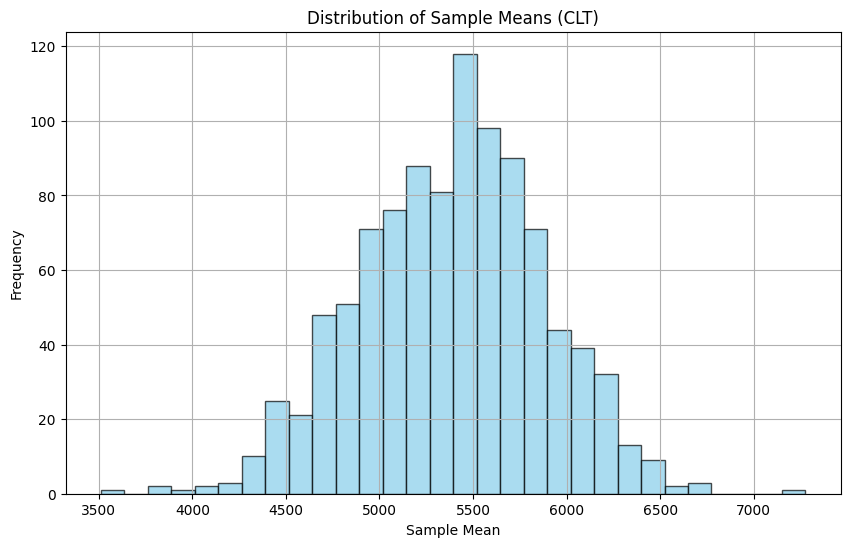

In [7]:
import matplotlib.pyplot as plt

# Number of samples to generate
num_samples = 1000

# List to store sample means
sample_means = []

# Generate random samples and calculate mean for each sample
for _ in range(num_samples):
    sample = df['Forest_Area'].sample(n=30)  # Sample size of 30
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means (CLT)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Exercise 4

Calculate a 95% confidence interval for the mean of a sample.

In [8]:
import scipy.stats as stats

# Sample data
sample = df['Forest_Area'].sample(n=30)  # Sample size of 30

# Sample statistics
sample_mean = sample.mean()
sample_std = sample.std()
sample_size = len(sample)

# Degrees of freedom
degrees_of_freedom = sample_size - 1

# Critical value (two-tailed t-test for 95% confidence)
critical_value = stats.t.ppf(0.975, df=degrees_of_freedom)

# Margin of error
margin_of_error = critical_value * (sample_std / (sample_size ** 0.5))

# Confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)
print("Sample Size:", sample_size)
print("Critical Value (t):", critical_value)
print("Margin of Error:", margin_of_error)
print("95% Confidence Interval:", confidence_interval)


Sample Mean: 4940.8
Sample Standard Deviation: 2541.525680808065
Sample Size: 30
Critical Value (t): 2.045229642132703
Margin of Error: 949.0212859420393
95% Confidence Interval: (3991.7787140579608, 5889.821285942039)


## Solutions

### Exercise 1

The population mean and variance are calculated on the entire dataset. Here, `ddof=0` is used in variance calculation since it's the population variance.


In [9]:
# Calculate the population_mean and population_variance
population_mean = df['Forest_Area'].mean()
population_variance = df['Forest_Area'].var(ddof=0)

print("Population Mean:", population_mean)
print("Population Variance:", population_variance)

Population Mean: 5378.98
Population Variance: 7517438.4416


### Exercise 2

In [10]:
# Select a random sample of 30 regions and calculate sample metrics
sample = df.sample(30)
sample_mean = sample['Forest_Area'].mean()
sample_variance = sample['Forest_Area'].var(ddof=1)

print("Sample mean:", sample_mean)
print("Sample variance:", sample_variance)

# Comparison with Population Metrics
print("\nComparison:")
print("Difference in means:", population_mean - sample_mean)
print("Difference in variances:", population_variance - sample_variance)


Sample mean: 5340.2
Sample variance: 7375771.613793104

Comparison:
Difference in means: 38.779999999999745
Difference in variances: 141666.8278068956


In the code snippet above:
* `df.sample(30)` randomly picks 30 entries from the DataFrame `df`. This subset represents a sample of the entire population (all regions in the dataset).
* `sample_mean` is the average forest area across the 30 randomly selected regions. 
* `sample_variance` measures how much the forest areas in our sample vary or spread out from the sample mean. The parameter `ddof=1` (degrees of freedom) is used here to make the variance estimate unbiased. 
* When calculating variance for a sample, dividing by `N-1` (where `N` is the sample size) instead of `N` corrects for the fact that we are working with a sample, not the entire population. This adjustment is known as **Bessel's correction**.
* **Difference in means** is the difference between the population mean and the sample mean. It shows how the average forest area of our sample compares to the average forest area of the entire dataset.
* **Difference in variances** is the difference between the population variance and the sample variance. It indicates how the variability of forest areas in our sample compares to the variability in the entire dataset.

### Exercise 3

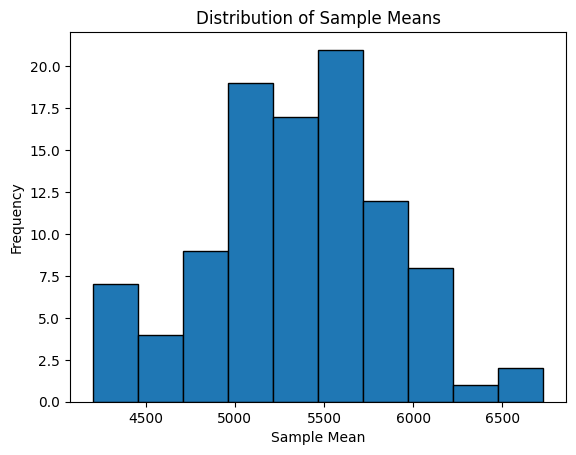

In [11]:
import matplotlib.pyplot as plt

# Take 100 samples of size 30 and plot their mean distribution
sample_means = [df['Forest_Area'].sample(30).mean() for _ in range(100)]

plt.hist(sample_means, bins=10, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.show()


The distribution of sample means will approximate a normal distribution, as evidenced by the histogram, even if the population distribution is not normal.

### Exercise 4 

In [12]:
import scipy.stats as stats

# Select a sample (reuse sample from Exercise 2 or select a new one)
sample_data = sample['Forest_Area']

# Calculate 95% confidence interval for the sample mean
mean = np.mean(sample_data)
standard_error = stats.sem(sample_data)
confidence_level = 0.95
degrees_freedom = len(sample_data) - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean, standard_error)

print("95% Confidence Interval:", confidence_interval)


95% Confidence Interval: (4326.0897287975995, 6354.3102712024)


#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>